<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [115]:
#!/usr/bin/env 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [116]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [117]:
df.index

RangeIndex(start=0, stop=1715, step=1)

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [118]:
df["STATE"] = 'MICHIGAN'
df["STATE"] = 'OHIO'



Find the average for your pedictor score across all states in 2019

In [119]:
yr = df["YEAR"] = '2019'



Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [120]:
df.max()

PRIMARY_KEY                     2019_WYOMING
STATE                                   OHIO
YEAR                                    2019
ENROLL                             6307022.0
TOTAL_REVENUE                     89217262.0
FEDERAL_REVENUE                    9990221.0
STATE_REVENUE                     50904567.0
LOCAL_REVENUE                     36105265.0
TOTAL_EXPENDITURE                 85320133.0
INSTRUCTION_EXPENDITURE           43964520.0
SUPPORT_SERVICES_EXPENDITURE      26058021.0
OTHER_EXPENDITURE                  3995951.0
CAPITAL_OUTLAY_EXPENDITURE        10223657.0
GRADES_PK_G                         256222.0
GRADES_KG_G                         535379.0
GRADES_4_G                          493415.0
GRADES_8_G                          500143.0
GRADES_12_G                         498403.0
GRADES_1_8_G                       3929869.0
GRADES_9_12_G                      2013687.0
GRADES_ALL_G                       6441557.0
AVG_MATH_4_SCORE                       253.0
AVG_MATH_8

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [121]:
df["YEAR"] > '2000'
df["GRADES_4_G"].unique
df["GRADES_8_G"].unique
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['OTHER_EXPENDITURE']


Final feature list: **data on unique 4th grade, data on unique 8th grade, support expenditure for students**

Feature selection justification: **I picked these features because some would help in getting specific data for the 4th and 8th grade students**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

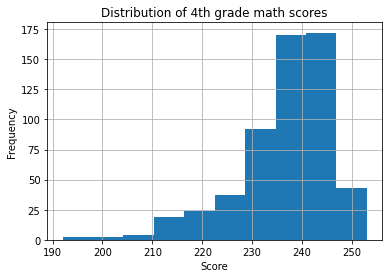

In [122]:
df.AVG_MATH_4_SCORE.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

**This helps us visualize data for the 4th grade math scores**

**Visualization 2**

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

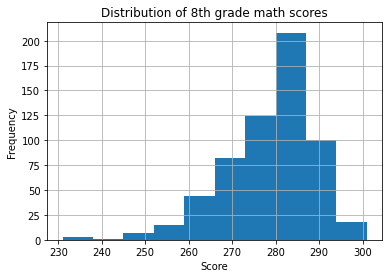

In [123]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

**This helps us visualize data for the 8th grade math scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X = df[['GRADES_4_G', 'GRADES_8_G', 'SUPPORT_SERVICES_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [127]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [128]:
# create your model here
model = LinearRegression()

In [131]:
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = model.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

C:\Users\adaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG SCORES'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MATH AND READING SCORES')

KeyError: 'AVG SCORES'

<h2> Summary </h2>

**I ran into a few errors trying to get the regression graph. However, my intenion was to plot the data for both math and reading scores in the data set. With the different scores, I wanted to compare them with all of the average scores in the data set to see how it would look in a graph. I predict the graph would not be scattered as much because scores would be mear a similar range and the average of the scores would be centralized in a common place.**